# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline
load_dotenv()

True

In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("news_api")

In [3]:
api_key

'5955b5959b2e4792b35ef3ec32c72d4e'

In [4]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

# Show the total number of news
bitcoin_news_en["totalResults"]

4096

In [6]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_news_en = newsapi.get_everything(
    q="ethereum",
    language="en"
)

# Show the total number of news
ethereum_news_en["totalResults"]

1298

In [7]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()



,date,text,compound,positive,negative,neutral
0,2020-08-06,"Casa, a Colorado-based provider of bitcoin sec...",0.5994,0.149,0.000,0.851
1,2020-08-03,"In April, the Secret Service seized 100 Bitcoi...",0.0000,0.000,0.000,1.000
2,2020-08-06,"The question still remained, though, whether a...",-0.0516,0.065,0.071,0.864
3,2020-08-04,A ransomware variant called NetWalker is doing...,0.5106,0.122,0.000,0.878
4,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.000,0.937


In [8]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = bitcoin_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2020-08-06,"Casa, a Colorado-based provider of bitcoin sec...",0.5994,0.149,0.000,0.851
1,2020-08-03,"In April, the Secret Service seized 100 Bitcoi...",0.0000,0.000,0.000,1.000
2,2020-08-06,"The question still remained, though, whether a...",-0.0516,0.065,0.071,0.864
3,2020-08-04,A ransomware variant called NetWalker is doing...,0.5106,0.122,0.000,0.878
4,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.000,0.937


In [9]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.411560,0.086450,0.005850,0.90770
std,0.225249,0.042427,0.018457,0.03952
min,-0.128000,0.000000,0.000000,0.80200
25%,0.365900,0.072000,0.000000,0.91000
50%,0.507000,0.090000,0.000000,0.91000
75%,0.507000,0.090000,0.000000,0.91425
max,0.750600,0.198000,0.071000,1.00000


In [10]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.00000
mean,0.411560,0.086450,0.005850,0.90770
std,0.225249,0.042427,0.018457,0.03952
min,-0.128000,0.000000,0.000000,0.80200
25%,0.365900,0.072000,0.000000,0.91000
50%,0.507000,0.090000,0.000000,0.91000
75%,0.507000,0.090000,0.000000,0.91425
max,0.750600,0.198000,0.071000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}
lemmatizer = WordNetLemmatizer()    

In [24]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}
    # Create a list of the words
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    # Convert the words to lowercase
    tokens = [word.lower() for word in words if word.lower() not in sw.union(sw_addons)]
    # Remove the punctuation
    #done above
      
    # Remove the stop words
      #done above
    
    # Lemmatize Words into root words
    #done above
    return tokens


In [25]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!
bitcoin_df['tokens'] = [tokenizer(text) for text in bitcoin_df['text']]
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-08-06,"Casa, a Colorado-based provider of bitcoin sec...",0.5994,0.149,0.000,0.851,"[casa, coloradobased, provider, bitcoin, secur..."
1,2020-08-03,"In April, the Secret Service seized 100 Bitcoi...",0.0000,0.000,0.000,1.000,"[april, secret, service, seized, bitcoins, cla..."
2,2020-08-06,"The question still remained, though, whether a...",-0.0516,0.065,0.071,0.864,"[question, still, remained, though, whether, g..."
3,2020-08-04,A ransomware variant called NetWalker is doing...,0.5106,0.122,0.000,0.878,"[ransomware, variant, called, netwalker, surpr..."
4,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.000,0.937,"[covid, pandemic, resulted, mass, shift, worki..."


In [28]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
ethereum_df['tokens'] = [tokenizer(text) for text in ethereum_df['text']]
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-08-06,"Casa, a Colorado-based provider of bitcoin sec...",0.5994,0.149,0.000,0.851,"[casa, coloradobased, provider, bitcoin, secur..."
1,2020-08-03,"In April, the Secret Service seized 100 Bitcoi...",0.0000,0.000,0.000,1.000,"[april, secret, service, seized, bitcoins, cla..."
2,2020-08-06,"The question still remained, though, whether a...",-0.0516,0.065,0.071,0.864,"[question, still, remained, though, whether, g..."
3,2020-08-04,A ransomware variant called NetWalker is doing...,0.5106,0.122,0.000,0.878,"[ransomware, variant, called, netwalker, surpr..."
4,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.000,0.937,"[covid, pandemic, resulted, mass, shift, worki..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [29]:
from collections import Counter
from nltk import ngrams

In [74]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitcoin_text = ' '.join(bitcoin_df['text'])
bitcoin_text_tokenized = tokenizer(bitcoin_text)
bigram_counts = Counter(ngrams(bitcoin_text_tokenized, n=2))
bigram_counts.most_common(10)


[(('satoshi', 'nakaboto'), 22),
 (('chars', 'robot'), 11),
 (('robot', 'colleague'), 11),
 (('colleague', 'satoshi'), 11),
 (('nakaboto', 'writes'), 11),
 (('writes', 'bitcoin'), 11),
 (('every', 'fucking'), 11),
 (('fucking', 'daywelcome'), 11),
 (('daywelcome', 'another'), 11),
 (('another', 'edition'), 11)]

In [50]:
word_counts = Counter(bitcoin_text)


In [73]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ethereum_text = ' '.join(ethereum_df['text'])
ethereum_text_tokenized = tokenizer(ethereum_text)
bigram_counts = Counter(ngrams(ethereum_text_tokenized, n=2))
bigram_counts.most_common(10)

[(('satoshi', 'nakaboto'), 22),
 (('chars', 'robot'), 11),
 (('robot', 'colleague'), 11),
 (('colleague', 'satoshi'), 11),
 (('nakaboto', 'writes'), 11),
 (('writes', 'bitcoin'), 11),
 (('every', 'fucking'), 11),
 (('fucking', 'daywelcome'), 11),
 (('daywelcome', 'another'), 11),
 (('another', 'edition'), 11)]

In [67]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [75]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_text_tokenized)
# YOUR CODE HERE!

[('bitcoin', 37),
 ('satoshi', 22),
 ('nakaboto', 22),
 ('chars', 20),
 ('robot', 11),
 ('colleague', 11),
 ('writes', 11),
 ('every', 11),
 ('fucking', 11),
 ('daywelcome', 11)]

In [76]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(ethereum_text_tokenized)

[('bitcoin', 37),
 ('satoshi', 22),
 ('nakaboto', 22),
 ('chars', 20),
 ('robot', 11),
 ('colleague', 11),
 ('writes', 11),
 ('every', 11),
 ('fucking', 11),
 ('daywelcome', 11)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]


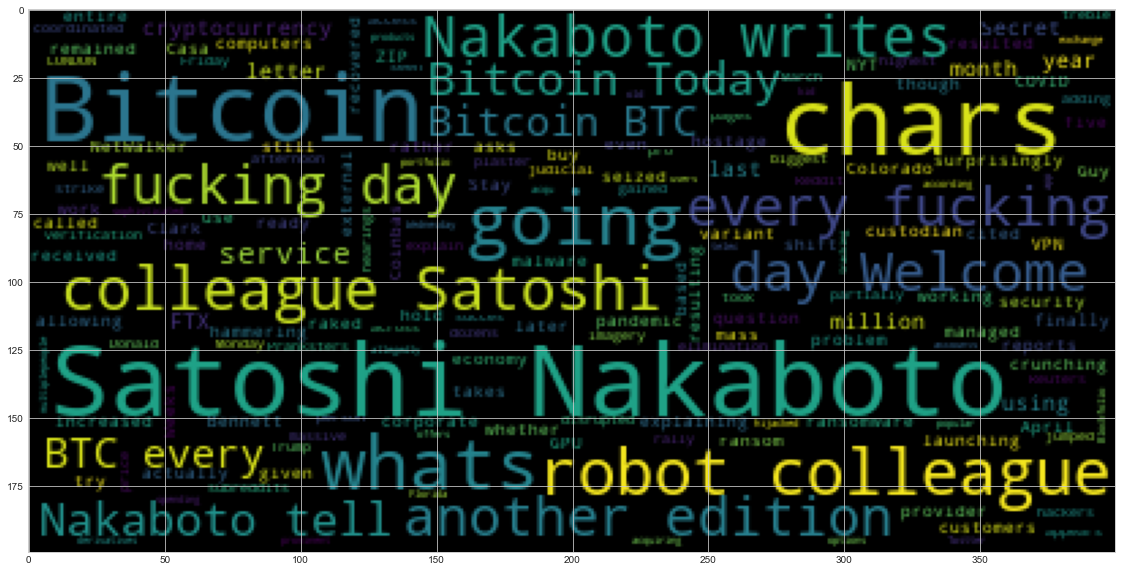

In [89]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wc = WordCloud().generate(bitcoin_text)
plt.imshow(wc)

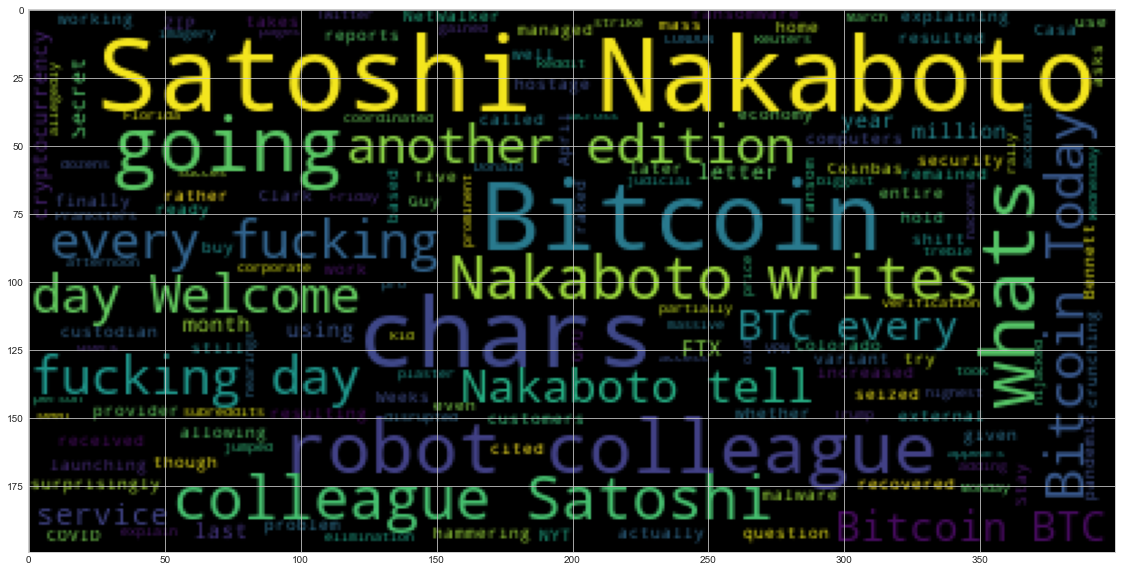

In [90]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wc = WordCloud().generate(ethereum_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [91]:
import spacy
from spacy import displacy

In [ ]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [92]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [ ]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!


In [95]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(bitcoin_text)

# Add a title to the document
# YOUR CODE HERE!



In [96]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [101]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc.ents if ent.label_ == 'ENT'])

[]


---

## Ethereum NER

In [ ]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!

In [97]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(ethereum_text)
# Add a title to the document
# YOUR CODE HERE!

In [98]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [100]:
# List all Entities
# YOUR CODE HERE!
print([ent.text for ent in doc.ents if ent.label_ == 'ENT'])

[]
